<a href="https://colab.research.google.com/github/LeeSeungwon89/Mathematics_for_Data_Analystics_Science/blob/main/2.%20%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**선형대수(linear algebra)**는 다차원 구조를 가진 수치의 나열을 다루는 수학 분야입니다. 인공지능에서 선형대수를 활용하면 많은 수치를 간결한 수식으로 처리하고 기술할 수 있습니다.

In [ ]:
# 기본적인 라이브러리입니다.
import time
import datetime
import random
import math

# 데이터 분석을 위한 라이브러리입니다.
import numpy as np
import pandas as pd
import sklearn as sk

# 수학 라이브러리입니다.
import scipy as sp
import statsmodels.api as sm

# 웹 스크레이핑을 위한 라이브러리입니다
import re
import requests
from bs4 import BeautifulSoup
import os
import json

# 시각화 라이브러리입니다.
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sns
import folium as flm

# 시각화 자료를 바로 띄워줍니다.
%matplotlib inline

# 그래프에 retina를 지정합니다.
%config InlineBackend.figure_format = 'retina'

# 음수 부호를 깨지지 않도록 합니다.
mpl.rc('axes', unicode_minus=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **1. 스칼라**

**스칼라(scalar)**는 보통 수치(1, 4.6, 1.5e6, -8 등)를 의미합니다. 행렬을 구성하는 원소 중에 최소 단위입니다.

# **2. 벡터**

**벡터(vector)**는 스칼라의 집합이며 스칼라를 직선 상에 나열한 것을 의미합니다. 스칼라는 크기만 가지고, 벡터는 크기와 방향을 가집니다. 벡터 표기는 아래와 같습니다.

> $\overrightarrow{a} = \begin{pmatrix}
3\\
4\\
5
\end{pmatrix}$

> $\overrightarrow{b} = \begin{pmatrix}
b_1\\
b_2\\
\vdots\\
b_m
\end{pmatrix}$

> $\overrightarrow{c} = (1.2, 3.21, -3.6, 0.1)$

> $\overrightarrow{d} = (d_1, d_2, \cdots, d_n)$

$\overrightarrow{a}$와 $\overrightarrow{b}$는 세로 벡터, $\overrightarrow{c}$와 $\overrightarrow{d}$는 가로 벡터입니다. 아울러 벡터의 원소를 변수로 나타낼 때 $\overrightarrow{b}$와 $\overrightarrow{d}$의 첨자(알파벳 아래 붙은 $n$) 수는 1개이며, 첨자의 개수에 따라 차원이 달라집니다. 벡터의 차원은 1차원입니다.

## **2.1. 내적**

**내적(inner product)**은 벡터끼리 곱하는 방식 중 하나입니다. 아래에 두 벡터가 존재한다고 가정하겠습니다.

> $\overrightarrow{a} = (a_1, a_2, \cdots, a_n)$

> $\overrightarrow{b} = (b_1, b_2, \cdots, b_n)$

두 벡터의 내적은 아래와 같습니다. 벡터의 내적을 구하려면 요소 개수는 같아야 합니다. 

> $\begin{align}
\overrightarrow{a} \cdot \overrightarrow{b} &= (a_1, a_2, \cdots, a_n) \cdot (b_1, b_2, \cdots, b_n) \\
&= (a_1b_1 + a_2b_2 + \cdots + a_nb_n) \\
&= \displaystyle\sum_{k=1}^{n} a_kb_k
\end{align}$

내적은 벡터간 **상관관계**를 구할 때 활용합니다. 상관관계는 **4. 확률 및 통계**에서 다룰 예정입니다.

`np.dot()` 메서드로 내적을 구할 수 있습니다.

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

np.dot(a, b)

35

`sum()` 메서드로도 내적을 구할 수 있습니다.

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

sum(a * b)

35

## **2.2. 놈**

**놈(norm)**은 벡터의 크기를 나타내는 양입니다. 인공지능에서는 $L^2$놈과 $L^1$놈을 자주 사용하여 **정칙화(regularization)**를 목적으로 삼습니다. 정칙화는 모델이 필요 이상으로 학습되지 않도록 파라미터 조정을 통해 방지하는 조치를 의미합니다.

먼저 $L^2$ 놈은 $||\overrightarrow{x}||_2$로 나타냅니다. 벡터의 각 요소를 제곱하고 합해서 제곱근을 구합니다.

> $\begin{align}
||\overrightarrow{x}||_2 &= \sqrt{x^2_1 + x^2_2 + \cdots + x^2_n} \\
&= \sqrt{\displaystyle\sum_{k=1}^{n} x^2_k}
\end{align}$

다음으로 $L^1$ 놈은 $||\overrightarrow{x}||_1$로 나타냅니다. 벡터의 각 요소의 절댓값을 더합니다.

> $\begin{align}
||\overrightarrow{x}||_1 &= |x_1| + |x_2| + \cdots + |x_n| \\
&= \displaystyle\sum_{k=1}^n |x_k|
\end{align}$

놈을 더 일반화한 $L^p$ 놈도 있습니다.

> $\begin{align}
||\overrightarrow{x}||_p &= |x^p_1| + |x^p_2| + \cdots + |x^p_n| \\
&= (\displaystyle\sum_{k=1}^n x^p_k)^{\frac{1}{p}}
\end{align}$

`np.linalg.norm()` 메서드로 놈을 구할 수 있습니다. 기본값은 $L^2$ 놈입니다.

In [ ]:
a = ([1, 3, 2, 6, -9])

np.linalg.norm(a)

11.445523142259598

$L^1$ 놈을 적용하겠습니다. $L^2$ 놈과 다른 값이 도출됩니다.

In [ ]:
a = ([1, 3, 2, 6, -9])

np.linalg.norm(a, 1)

21.0

# **3. 행렬**

**행렬(matrix)**은 벡터의 집합입니다. 행렬을 구성하는 스칼라 값은 **원소(element)**라고 부릅니다.

## **3.1. 행렬 곱**

행렬 $A$와 $B$가 있다고 가정하겠습니다.

> $A =
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
\end{pmatrix}$

> $B =
\begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
b_{31} & b_{32}
\end{pmatrix}$

이 두 행렬을 **행렬곱(matrix multiplication)**하면 아래 형식이 됩니다.

> $\begin{align}
AB &=
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
\end{pmatrix}
\begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
b_{31} & b_{32}
\end{pmatrix} \\
&= \begin{pmatrix}
a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31} & a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32} \\
a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31} & a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32} \\
\end{pmatrix} \\
&= \begin{pmatrix}
\displaystyle\sum_{k=1}^3 a_{1k}b_{k1} & \displaystyle\sum_{k=1}^3 a_{1k}b_{k2} \\
\displaystyle\sum_{k=1}^3 a_{2k}b_{k1} & \displaystyle\sum_{k=1}^3 a_{2k}b_{k2}
\end{pmatrix}
\end{align}$

쉽게 말하면 $A$의 1행과 $B$의 1열 및 2열을 각각 곱해서 1행의 두 원소로 삼습니다. $A$의 2행과 $B$의 1열 및 2열을 각각 곱해서 2행의 두 원소로 삼습니다. 참고로 행렬곱 계산 조건은 앞 행렬의 열수와 뒷 행렬의 행수가 같아야 합니다. 예컨대 앞 행렬의 열수가 2라면 뒷 행렬의 행수가 2여야 합니다.

행렬곱을 일반화하면 아래와 같습니다.

> $\begin{align}
AB &=
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1m} \\
a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots  \\
a_{l1} & a_{l2} & \cdots & a_{lm}
\end{pmatrix}
\begin{pmatrix}
b_{11} & b_{12} & \cdots & b_{1n} \\
b_{21} & b_{22} & \cdots & b_{2n} \\
\vdots & \vdots & \ddots & \vdots  \\
b_{m1} & b_{m2} & \cdots & b_{mn}
\end{pmatrix} \\
&= \begin{pmatrix}
\displaystyle\sum_{k=1}^m a_{1k}b_{k1} & \displaystyle\sum_{k=1}^m a_{1k}b_{k2} & \cdots & \displaystyle\sum_{k=1}^m a_{1k}b_{kn} \\
\displaystyle\sum_{k=1}^m a_{2k}b_{k1} & \displaystyle\sum_{k=1}^m a_{2k}b_{k2} & \cdots & \displaystyle\sum_{k=1}^m a_{2k}b_{kn} \\
\vdots & \vdots & \ddots & \vdots  \\
\displaystyle\sum_{k=1}^m a_{lk}b_{k1} & \displaystyle\sum_{k=1}^m a_{lk}b_{k2} & \cdots & \displaystyle\sum_{k=1}^m a_{lk}b_{kn}
\end{pmatrix}
\end{align}$

`np.dot()` 메서드를 사용하여 행렬곱을 하겠습니다.

In [ ]:
a = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])
b = np.array([[1, 2], 
              [3, 4],
              [5, 6],
              [7, 8]])
np.dot(a, b)

array([[ 34,  40],
       [ 98, 120],
       [162, 200]])

## **3.2. 원소별 곱**

행렬의 원소별 곱(**아다마르 곱**)은 같은 위치의 각 원소를 곱하는 것입니다.

행렬 $A$와 $B$가 있다고 가정하겠습니다.

> $A =
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}$

> $B = \begin{pmatrix}
b_{11} & b_{12} & \cdots & b_{1n} \\
b_{21} & b_{22} & \cdots & b_{2n} \\
\vdots & \vdots & \ddots & \vdots  \\
b_{m1} & b_{m2} & \cdots & b_{mn}
\end{pmatrix}$

계산 방식은 아래와 같습니다.

> $A \circ B = \begin{pmatrix}
a_{11}b_{11} & a_{12}b_{12} & \cdots & a_{1n}b_{1n} \\
a_{21}b_{21} & a_{22}b_{22} & \cdots & a_{2n}b_{2n} \\
\vdots & \vdots & \ddots & \vdots  \\
a_{m1}b_{m1} & a_{m2}b_{m2} & \cdots & a_{mn}b_{mn}
\end{pmatrix}$

원소별 곱은 메서드가 아닌 `*` 연산자로 계산합니다. 코드는 생략합니다.

## **3.3. 전치**

**전치(transpose)**는 행렬의 행과 열을 바꾸는 작업입니다.

> $A =
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
\end{pmatrix}$

> $A^T =
\begin{pmatrix}
1 & 4 \\
2 & 5 \\
3 & 6
\end{pmatrix}$

아래 두 행렬로는 행렬곱을 할 수 없습니다. 행렬 $A$의 열 개수와 행렬 $B$의 행 개수가 다르기 때문입니다.

> $A =
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
\end{pmatrix}$

> $B =
\begin{pmatrix}
6 & 5 & 4 \\
3 & 2 & 1 \\
\end{pmatrix}$

행렬곱을 하기 위한 조건에 부합하지 않더라도 아래처럼 행렬을 전치하여 행렬곱을 가능하게 하는 경우가 있습니다. 

> $B^T =
\begin{pmatrix}
6 & 3 \\
5 & 2 \\
4 & 1
\end{pmatrix}$

행렬 $A$의 열 개수와 행렬 $B^T$의 행 개수가 같습니다. 행렬곱이 가능합니다.

참고로 코드 상에서 임의의 행렬인 a을 전치하려면 `a.T` 형식을 취합니다. 코드는 생략합니다.

## **3.4. 단위행렬**

**단위행렬(identity matrix)**은 행과 열의 수가 같고, 좌측 상단(첫 번째 위치)에서 우측 하단(마지막 위치)까지 1로 채워지고 나머지 원소는 0으로 채워진 행렬입니다. 

> $E =
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}$

> $E =
\begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}$

> $E = 
\begin{pmatrix}
 1 & 0 & \cdots & 0 \\
 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots  \\
 0 & 0 & \cdots & 1
\end{pmatrix}$

행렬의 앞이나 뒤에서 단위행렬과 행렬곱을 해도 행렬의 형태를 그대로 유지합니다.

> $E =
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}$

> $A =
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}$

> $EA =
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}=
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}$

> $AE =
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}=
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}$

`np.eye()` 메서드를 사용하여 단위행렬을 만들 수 있습니다.

In [ ]:
print(np.eye(2))
print()
print(np.eye(3))
print()
print(np.eye(100))

[[1. 0.]
 [0. 1.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## **3.5. 역행렬**

**역행렬(inverse matrix)**은 행렬에 곱했을 때 단위행렬로 만드는 행렬을 의미합니다.

> $A^{-1}A = AA^{-1} = E$

역행렬 $A^{-1}$을 $A$ 행렬의 앞과 뒤 무관하게 곱해도 단위행렬이 됩니다. 다만 행렬 $A$는 행과 열의 개수가 같은 반드시 **정방행렬(=정사각행렬, square matrix)**이어야 합니다.

물론 역행렬이 존재하지 않는 행렬도 있습니다. **행렬식(determinant)**을 통해 역행렬의 존재 여부를 파악할 수 있습니다. 행렬 $A$가 있다고 가정하겠습니다.

> $A =
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}$

행렬식은 $|A|$ 또는 $det A$ 표현합니다. 공식은 아래와 같습니다.

> $|A| = det A = ad - bc$

이 공식에서 $ad - bc = 0$이면 역행렬은 존재하지 않으며, $0$이 아닌 수라면 역행렬은 존재합니다.

역행렬이 존재한다면 아래 공식으로 역행렬을 구할 수 있습니다.

> $A^{-1} = \frac{1}{ad-bc}\begin{pmatrix}
 d & -b\\
 -c & a
\end{pmatrix}$

코드로 위 수식을 적용하겠습니다. 먼저 `np.linalg.det()` 메서드로 행렬식을 구합니다.

In [ ]:
a = np.array([[1, 2],
              [3, 4]])
np.linalg.det(a)

-2.0000000000000004

행렬 `a`는 0이 아닌 수이므로 역행렬이 존재합니다. 다른 행렬도 적용하겠습니다.

In [ ]:
b = np.array([[0, 0],
              [3, 6]])
np.linalg.det(b)

0.0

행렬 `b`는 역행렬이 존재하지 않습니다.

`np.linalg.inv()` 메서드로 행렬 `a`의 역행렬을 구하겠습니다.

In [ ]:
a = np.array([[1, 2],
              [3, 4]])
linalg_a = np.linalg.inv(a)
linalg_a

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

역행렬을 행렬 `a`와 행렬곱을 하겠습니다.

In [ ]:
print(np.dot(linalg_a, a))
print()
print(np.dot(a, linalg_a))

[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


앞 뒤 무관하게 행렬곱을 해도 단위행렬이 됩니다.

# **4. 텐서**

n차원인 행렬을 **텐서(tensor)**라고 합니다. 스칼라를 여러 차원으로 나열한 것이며 스칼라와 벡터, 행렬을 포함합니다. 스칼라는 0차원 텐서, 벡터는 1차원 텐서, 행렬은 2차원 텐서, 그 이상은 n차원 텐서라고 설명할 수 있습니다. 첨자 개수에 따라 차원이 정해진다고 생각하면 간편합니다.

코드로 3차원 텐서를 만들겠습니다.

In [ ]:
a = np.array([[[0, 1, 2],
               [4, 5, 6],
               [7, 8, 9]],
              [[9, 8, 7],
               [6, 5, 4],
               [3, 2, 1]]])
print(a)
print()
print(np.shape(a))

[[[0 1 2]
  [4 5 6]
  [7 8 9]]

 [[9 8 7]
  [6 5 4]
  [3 2 1]]]

(2, 3, 3)


행렬 2개가 함께 들어있습니다. 첨자는 3개로 3차원을 의미합니다.

# **5. 선형변환**

선형변환(linear transformation)은 두 벡터의 공간 사이의 함수를 의미합니다. 예컨대 벡터를 확대하거나 축소하고 회전시키거나 반사하는 작업 모두 선형 변환입니다.

## **5.1. 선형변환**

벡터 $\overrightarrow{a}$와 행렬 $A$가 있다고 가정하겠습니다.

> $\overrightarrow{a} =
\begin{pmatrix}
1\\
2
\end{pmatrix}$

> $A =
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}$

벡터 $\overrightarrow{a}$를 행렬 $A$와 행렬곱 하겠습니다.

In [ ]:
A = np.array([[1, 2],
              [3, 4]])
a = np.array([1, 2])
np.dot(A, a)

array([ 5, 11])

도출된 값은 벡터 $\overrightarrow{b}$라고 가정합니다. 행렬 $A$에 의해 벡터 $\overrightarrow{a}$가 벡터 $\overrightarrow{b}$로 **선형변환** 된 것입니다.

$\overrightarrow{b} = A\overrightarrow{a} = \begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
\begin{pmatrix}
1\\
2
\end{pmatrix} = \begin{pmatrix}
5\\
11
\end{pmatrix}$

뉴럴 네트워크에서는 선형변환을 활용하여 신경 세포에 대한 여러 입력에 가중치를 곱한 총합을 계산합니다.

`plt.quiver()` 메서드를 활용하여 벡터 $\overrightarrow{a}$와 벡터 $\overrightarrow{b}$를 화살표로 그리겠습니다.

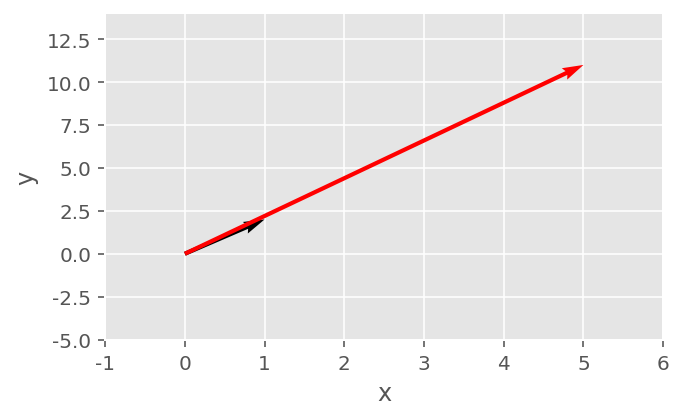

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(5, 3))

# 시작점을 설정합니다.
start = np.array([0, 0])
# 벡터 b를 인스턴스화합니다.
b = np.array([5, 11]) 

# `start[0]`과 `start[1]`은 시작점 x와 y입니다.
# `vector[0]`과 `vector[1]`은 화살표의 x성분과 y성분입니다.
# `angles`는 화살표 각도의 결정 방법, `scale_units`는 스케일 단위, `scale`은 스케일입니다.
def test_quiver(start, vector, color):
    plt.quiver(start[0], start[1], vector[0], vector[1], angles='xy',
               scale_units='xy', scale=1, color=color)

test_quiver(start, a, color='k')
test_quiver(start, b, color='r')

plt.xlim([-1, 6])
plt.ylim([-5, 14])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## **5.2. 표준기저**

벡터 $\overrightarrow{a}$가 있다고 가정하겠습니다.

> $\overrightarrow{a} =
\begin{pmatrix}
3\\
4
\end{pmatrix}$

벡터 $\overrightarrow{a}$는 아래 식과 같습니다. 여기서 두 벡터가 발생합니다.

> $\overrightarrow{a} =
\begin{pmatrix}
3\\
4
\end{pmatrix} =
3 \begin{pmatrix}
1\\
0
\end{pmatrix} + 
4 \begin{pmatrix}
0\\
1
\end{pmatrix}$

> $\overrightarrow{e}_x = 
\begin{pmatrix}
1\\
0
\end{pmatrix}$

> $\overrightarrow{e}_y = 
\begin{pmatrix}
0\\
1
\end{pmatrix}$

이 벡터들을 **표준기저(natural basis)**라고 부릅니다. 계산식을 표기화하면 아래와 같습니다.

> $3\overrightarrow{e}_x + 2\overrightarrow{e}_y$

위 벡터와 표준기저를 그리고 설명을 이어가겠습니다. 위에서 생성한 `test_quiver` 메서드를 사용하여 그리겠습니다.

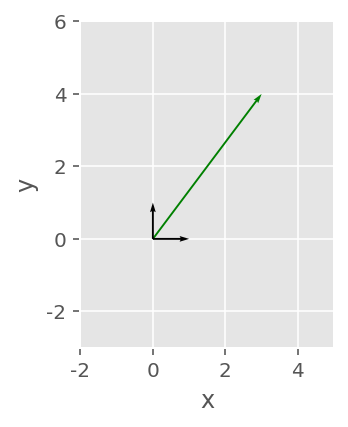

In [ ]:
a = np.array([3, 4])
e_x = np.array([1, 0])
e_y = np.array([0, 1])

plt.figure(figsize=(5, 3))

test_quiver(start, a, color='g')
test_quiver(start, e_x, color='k')
test_quiver(start, e_y, color='k')

plt.xlim(-2, 5)
plt.ylim(-3, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')

plt.show()

검정선 표준기저에 각각 상수를 곱하고 더하면 초록선 벡터로 도출됩니다.

수식을 일반화하면 아래와 같습니다.

> $\overrightarrow{a} = \displaystyle\sum_{j=1}^m r_{j}\overrightarrow{e}_j$

$r_j$은 상수, $\overrightarrow{e}_j$는 표준기저입니다.

행렬 $A$에 $\overrightarrow{a}$을 행렬곱 하여 선형변환을 한다면 아래와 같습니다.

> $A =
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1m} \\
a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots  \\
a_{n1} & a_{n2} & \cdots & a_{nm}
\end{pmatrix}$

> $\overrightarrow{b} = A\overrightarrow{a}$

> $\overrightarrow{b} = \displaystyle\sum_{k=1}^n s_{k}\overrightarrow{e}_k$

$s_{k}$는 표준기저에 곱하는 상수입니다.

> $s_k = \displaystyle\sum_{j=1}^m r_{j}a_{kj}$

만약 행렬 $A$가 정방행렬이 아니라면 벡터의 원소 개수는 변합니다.

> $\begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix}
\begin{pmatrix}
1 \\
2
\end{pmatrix} =
\begin{pmatrix}
5 \\
11 \\
17
\end{pmatrix}$

# **6. 고윳값 및 고유벡터**

정방행렬 $A$가 존재한다고 가정하겠습니다. 행렬 $A$와 다음 관계를 만족하는 스칼라 $\lambda$를 행렬 $A$의 **고윳값**이라고 부르며, 벡터 $\overrightarrow{x}$를 행렬 $A$의 **고유벡터**라고 부릅니다. 

> $A \overrightarrow{x} = \lambda \overrightarrow{x}$

고윳값은 고유 벡터가 변환되는 크기의 정도이며, 고유벡터는 선형변환을 취하면 각 원소가 고윳값만큼 배가 되는 벡터입니다(방향은 그대로 유지되면서 크기만 변합니다). 다시 말하면, 벡터 $\overrightarrow{x}$에 선형 변환 $A$를 취하면 기존 벡터의 방향은 그대로이면서 길이만 $\lambda$만큼 변합니다.

고유벡터를 구하는 수식을 설명하기 위해 간단한 예를 들겠습니다. 단위 행렬 $E$를 곱해도 벡터는 변화하지 않으므로 아래처럼 수식화할 수 있습니다.

> $E = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}$

> $A \overrightarrow{x} = \lambda E \overrightarrow{x}$

이 수식의 좌변으로 우변을 이항하면 아래 수식과 같습니다.

> $(A - \lambda E) \overrightarrow{x} = \overrightarrow{0}$

$\overrightarrow{0}$는 모든 원소가 0인 벡터입니다. 여기에 행렬 $(A - \lambda E)$가 역행렬 $(A - \lambda E)^{-1}$을 가진다고 가정하고 양 변에 곱하겠습니다.

> $\overrightarrow{x} = (A - \lambda E)^{-1} \overrightarrow{0} = \overrightarrow{0}$

결론적으로 $\overrightarrow{x} = \overrightarrow{0}$가 됐습니다.

만약 행렬 $(A - \lambda E)$가 역행렬이 없는 경우라면 아래 식으로 표현됩니다. 고윳값을 구하는 식이며 **고유방정식**입니다.

> $det(A - \lambda E) = 0$

예시로 고윳값을 계산하겠습니다. 계산에 사용할 수식은 $det(A - \lambda E) = 0$입니다.

> $A = \begin{pmatrix}
3 & 1 \\
2 & 4
\end{pmatrix}$

> $det\begin{pmatrix}\begin{pmatrix}
3 & 1 \\
2 & 4
\end{pmatrix} - \lambda \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\end{pmatrix} = 0$

> $det\begin{pmatrix}
3 - \lambda & 1 \\
2 & 4 - \lambda
\end{pmatrix} = 0$

> $(3 - \lambda)(4 - \lambda) - 1 \times 2 = 0$

> $\lambda^2  - 7\lambda + 10 = 0$

> $(\lambda - 2)(\lambda - 10) = 0$

고윳값 $\lambda$는 2 또는 5입니다.

다음은 고유벡터를 구하겠습니다. $\lambda$가 2인 경우와 5인 경우 모두를 고려해야 합니다. 고유벡터를 구하는 데 사용할 식은 $(A - \lambda E) \overrightarrow{x} = \overrightarrow{0}$입니다.

먼저 $\lambda = 2$일 때 $\overrightarrow{x}$를 아래와 같이 가정합니다.

> $\overrightarrow{x} =
\begin{pmatrix}
p \\
q
\end{pmatrix}$

여기에 $(A - \lambda E) \overrightarrow{x} = \overrightarrow{0}$을 적용하겠습니다.

> $(A - 2E) \begin{pmatrix}
p \\
q
\end{pmatrix} = \overrightarrow{0}$

> $\begin{pmatrix}
3 - 2 & 1 \\
2 & 4 - 2
\end{pmatrix} \begin{pmatrix}
p \\
q
\end{pmatrix} = \overrightarrow{0}$

> $\begin{pmatrix}
1 & 1 \\
2 & 2
\end{pmatrix} \begin{pmatrix}
p \\
q
\end{pmatrix} = \overrightarrow{0}$

> $\begin{pmatrix}
p + q \\
2p + 2q
\end{pmatrix} = \overrightarrow{0}$

$p + q = 0$입니다. 이 조건을 만족하는 아래 벡터가 $\lambda = 2$일 때 $A$의 고유벡터가 되는 것입니다. $t$는 임의의 실수입니다.

> $\overrightarrow{x} = \begin{pmatrix}
t \\
-t
\end{pmatrix}$

위와 같은 방식으로 $\lambda = 5$일 때 고유벡터를 구하겠습니다.

> $\begin{pmatrix}
3 - 5 & 1 \\
2 & 4 - 5
\end{pmatrix} \begin{pmatrix}
p \\
q
\end{pmatrix} = \overrightarrow{0}$

> $\begin{pmatrix}
-2 & 1 \\
2 & -1
\end{pmatrix} \begin{pmatrix}
p \\
q
\end{pmatrix} = \overrightarrow{0}$

> $\begin{pmatrix}
-2p + q \\
2p - q
\end{pmatrix} = \overrightarrow{0}$

$2p - q = 0$입니다. $t$는 임의의 실수입니다.

> $\overrightarrow{x} = \begin{pmatrix}
t \\
2t
\end{pmatrix}$

위에서 설명한 내용을 코드로 구현하려면 `np.linalg.eig()` 메서드를 사용합니다. 이 메서드를 사용하여 고윳값과 고유벡터를 구할 수 있습니다. 

In [20]:
a = np.array([[3, 1],
              [2, 4]])

eig_a = np.linalg.eig(a)
print('고윳값:', eig_a[0])
print('고유벡터:', eig_a[1])

고윳값: [2. 5.]
고유벡터: [[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


첫 번째 배열(array)은 고윳값으로 2와 5가 출력됐습니다. 두 번째 배열은 행렬로 출력되었으며 열은 고유벡터를 의미합니다. 고윳값(eigenvalue)과 고유벡터(eigenvector)는 **주성분 분석(principal component analysis)**에서 사용됩니다. 각 고유벡터는 $L^2$놈이 1입니다. $L^2$놈이 1인 벡터를 **단위벡터**라고 부릅니다. 단위벡터는 주어진 벡터와 방향은 같고 크기가 1인 벡터입니다.



# **7. 코사인 유사도** 

**코사인 유사도(cosine similarity)**는 벡터간 방향의 가까운 정도를 의미합니다.